### Base de dados

Neste notebook vamos exemplificar como se pode pegar na informação que se extrai dos registos do Genbank e se insere num abase de dados.

Nos exemplos seguintes faz-se o seguinte:
- Cria-se um anova tabela em BD para receber os dados
- Faz-se a extração de alguns dados do registo Genbank e inserem-se esses dados na tabela criada
- Carrega-se o conteúdo da tabela de base de dados num tabela pandas.
- Mostra-se um gráfico muito simples.

In [39]:
#pip install mysql-connector

import mysql.connector as SQLC

DataBase = SQLC.connect(
   host ="geo.di.uminho.pt",
   user ="bioinformatica",
   password ="20221207",
    database ="bioinformatica"
)
Cursor = DataBase.cursor()

TableName ="""CREATE TABLE genbank_pg45472_
    (
    locusid varchar(255) PRIMARY KEY, 
    dnasource text, 
    dnasequence LONGTEXT,
    prot text
    );
"""

Cursor.execute(TableName)

ProgrammingError: 1050 (42S01): Table 'genbank_pg45472_' already exists

In [41]:
import mysql.connector as SQLC

DataBase = SQLC.connect(
   host ="geo.di.uminho.pt",
   user ="bioinformatica",
   password ="20221207",
    database ="bioinformatica"
)
Cursor = DataBase.cursor()

TableName =""" DROP TABLE genbank_pg45472_
    (
    locusid varchar(255) PRIMARY KEY,
    dnasource text,
    dnasequence LONGTEXT,
    prot text,

    );
"""

Cursor.execute(TableName)

#FALTA ADICIONAR O PUBMED

ProgrammingError: 1064 (42000): You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '(
    locusid varchar(255) PRIMARY KEY,
    dnasource text,
    dnasequence LONG' at line 2

In [30]:
import re
import mysql.connector as SQLC

fonte = open("L42022.1.gb",'r')
# fonte = open("L42023.1.gb",'r')
locus = fonte.read()
fonte.close()
pubmed=''
pm = re.search(r'PUBMED\s+.+', locus)
if pm:
    m = re.match(r'PUBMED\s+(.+)', o[0] )
    if m:
        pubmed = m.group(1)

proteina=""
p=re.search(r'\/protein_id=\"(\S+)\"',locus)
if p:
    proteina = p.group(1)

id = ""
i = re.match(r'LOCUS\s+(\w+)', locus)
if i:
    id = i.group(1)
organism = ""
o = re.search(r'SOURCE\s+.+', locus)
if o:
    s = re.match(r'SOURCE\s+(.+)', o[0] )
    if s:
        organism = s.group(1)
sequencia = ""
existe = re.findall(r'^\s+\d+ [actg ]+', locus, re.MULTILINE )
if existe:
    for linha in existe:
        m = re.match( r'\s+\d+ (.+)', linha, re.DOTALL )
        # print( m.group(1) )
        # print( re.sub(r'\s+', '', m.group(1) ) ) 
        sequencia = sequencia + re.sub(r'\s+', '', m.group(1) )
print ( id, organism, sequencia, proteina )

DataBase = SQLC.connect(
    host ="geo.di.uminho.pt",
    user ="bioinformatica",
    password ="20221207",
    database ="bioinformatica"
)
Cursor = DataBase.cursor()

sql = "INSERT INTO genbank_pg45472_ (locusid, dnasource, dnasequence, prot) VALUES (%s, %s, %s, %s)"
val = (id, organism, sequencia, proteina)
Cursor.execute(sql, val)

DataBase.commit()

print(Cursor.rowcount, "record inserted.")

HIVI5C Human immunodeficiency virus 1 (HIV-1) catccagtacatgcagggcctattgcaccaggccaaatgagagaaccaaggggaagtgacatagcaggaactacaagtacccttcaggaacaagtagcatggatgacaggtaacccacctgttccagtgggagaaatctataaaagatggataattctgggattaaataaaatagtaagaatgtatagccctgtcagcattttggacataaaacaagggccaaaggaaccc AAB50165.1
1 record inserted.


In [37]:
import mysql.connector
import pandas as pd 
my_conn = mysql.connector.connect(
    host ="geo.di.uminho.pt",
    user ="bioinformatica",
    password ="20221207",
    database ="bioinformatica"
    )
####### end of connection ####
tabela = pd.read_sql("SELECT locusid, length(dnasequence) as comprimento FROM genbank_pg45472_",my_conn)


C:\Users\maryg\AppData\Local\Temp\ipykernel_7268\2465799912.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  tabela = pd.read_sql("SELECT locusid, length(dnasequence) as comprimento FROM genbank_pg45472_",my_conn)


In [38]:
tabela

,locusid,comprimento
0,HIVI5C,231


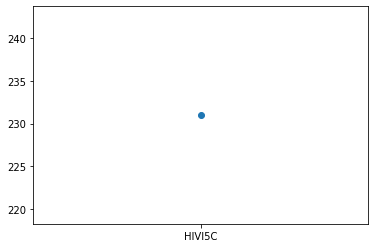

In [10]:
import matplotlib.pyplot as plt

x = tabela.locusid
y = tabela.comprimento
plt.scatter( x, y)